<h1>A short project on data analysis with pandas with some sales csv files</h1>

<p>first lets import all the necessary modules</p>

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib as mtl

In [3]:
# get the all the files path in the sales_data folder

In [9]:
paths = []
for path in os.scandir("./sales_data"):
    paths.append(path.path)
paths

['./sales_data\\Sales_April_2019.csv',
 './sales_data\\Sales_August_2019.csv',
 './sales_data\\Sales_December_2019.csv',
 './sales_data\\Sales_February_2019.csv',
 './sales_data\\Sales_January_2019.csv',
 './sales_data\\Sales_July_2019.csv',
 './sales_data\\Sales_June_2019.csv',
 './sales_data\\Sales_March_2019.csv',
 './sales_data\\Sales_May_2019.csv',
 './sales_data\\Sales_November_2019.csv',
 './sales_data\\Sales_October_2019.csv',
 './sales_data\\Sales_September_2019.csv']

In [7]:
# take all the csv file and add them in a single_file

In [11]:
df = pd.DataFrame()

for path in paths:
    temp_df = pd.read_csv(path)
    df = pd.concat([df, temp_df], ignore_index=True)

In [12]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [13]:
df.shape

(186850, 6)

it seems there are some null values so we should get rid of them

In [22]:
df[df.isnull()].sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
143241,NaN,NaN,NaN,NaN,NaN,NaN
18180,NaN,NaN,NaN,NaN,NaN,NaN
167778,NaN,NaN,NaN,NaN,NaN,NaN
37963,NaN,NaN,NaN,NaN,NaN,NaN
116996,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [26]:
# is seems null values only includes occupies all teh 545 values in all the columns

In [28]:
df1 = df.dropna(how='all') # how=all only drops any when all the columns are null
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [29]:
df1.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [30]:
# lets save the combined dataframe into one csv file

In [32]:
df1.to_csv('./output/all_sales_data.csv', index=False)

In [33]:
# now get the new combined file and load it into a new_dataframe

In [34]:
df2 = pd.read_csv('./output/all_sales_data.csv')
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [38]:
# checking the types of data in each column
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186305 entries, 0 to 186304
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.5+ MB


In [42]:
# lets convert the columns containing numeric value to numbers

df3 = df2.copy()
df3['Quantity Ordered'].astype("int32")

ValueError: invalid literal for int() with base 10: 'Quantity Ordered'

In [46]:
# lets see where the problem occured
df3[df3["Quantity Ordered"] == "Quantity Ordered"].head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
517,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1146,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1152,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2869,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2884,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [48]:
# the problem would be solved if we discards these rows
df4 = df3[~(df3["Order ID"] == "Order ID")]
df4.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [55]:
df5 = df4.copy()

In [62]:
df5['Quantity Ordered'] = df5["Quantity Ordered"].astype('int')
df5['Price Each'] = df5["Price Each"].astype('float32')
df5.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [63]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186304
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int32  
 3   Price Each        185950 non-null  float32
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float32(1), int32(1), object(4)
memory usage: 8.5+ MB


In [64]:
# lets save the dataframe again
df5.to_csv('./output/all_sales_data.csv', index=False)

<h1>Find out which cites has the highest sales in numbers and in sales values</h1>

In [157]:
df6 = pd.read_csv('./output/all_sales_data.csv')
df6.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95000,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99000,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [66]:
# we can get the city names thought the purchase address columns

In [3]:
df6["Cities"] = df6["Purchase Address"].str.split(',').str[1].str.strip()
df6["price"] = df6["Quantity Ordered"] * df6["Price Each"]
df6.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Cities,price
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Boston,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Los Angeles,11.99


In [4]:
df7 = df6[['Quantity Ordered', 'Cities', 'price']]
df7.head()

,Quantity Ordered,Cities,price
0,2,Dallas,23.90
1,1,Boston,99.99
2,1,Los Angeles,600.00
3,1,Los Angeles,11.99
4,1,Los Angeles,11.99


In [5]:
# to split data according to the cities we should use groupby() method
grp = df7.groupby("Cities")
grp

In [92]:
# lets get the number of sales per city

In [7]:
number_of_sales = grp["Quantity Ordered"].sum()
number_of_sales.head()

Cities
Atlanta        16602
Austin         11153
Boston         22528
Dallas         16730
Los Angeles    33289
Name: Quantity Ordered, dtype: int64

In [8]:
cities = number_of_sales.index
count_values = number_of_sales.values

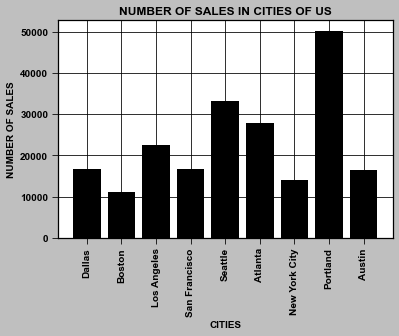

In [49]:
plt.style.use('grayscale')

fig = plt.figure()
ax = fig.add_subplot()

ax.bar(cities, count_values)
ax.set_xlabel('CITIES', fontweight='bold')
ax.set_ylabel('NUMBER OF SALES', fontweight='bold')

plt.xticks(cities, rotation='vertical', fontweight='bold')
plt.yticks(fontweight='bold')
plt.title('NUMBER OF SALES IN CITIES OF US', fontweight='bold')
plt.grid(True)

plt.show()

<h2> So we can say that San Francisco has has the highest number of sales</h2>

In [12]:
# to change the scientific notation sum values to float values
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [13]:
prices_per_city = grp["price"].sum()
prices_per_city.head()

Cities
Atlanta       2795498.58000
Austin        1819581.75000
Boston        3661642.01000
Dallas        2767975.40000
Los Angeles   5452570.80000
Name: price, dtype: float64

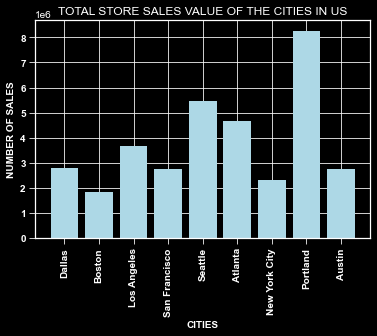

In [48]:
sum_values = prices_per_city

plt.style.use('dark_background')
fig = plt.figure()
ax = plt.gca()

ax.bar(cities, sum_values, color='lightblue')
ax.set_xlabel('CITIES', fontweight='bold')
ax.set_ylabel('NUMBER OF SALES', fontweight='bold')

plt.xticks(cities, rotation='vertical', fontweight='bold')
plt.yticks(fontweight='bold')

plt.title('TOTAL STORE SALES VALUE OF THE CITIES IN US')
plt.grid(True)

plt.show()

<h2>San franscisco also have highest sales value</h2>

<h1>Figure out which time is best for sale in each city</h1>

In [33]:
df8 = pd.read_csv('./output/all_sales_data.csv')
df8.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95000,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99000,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [34]:
df8["Cities"] = df8["Purchase Address"].str.split(',').str[1].str.strip()
df8.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Cities
0,176558,USB-C Charging Cable,2,11.95000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas
1,176559,Bose SoundSport Headphones,1,99.99000,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Boston


In [35]:
# to get the hours out the order Date column we first need to convert it to datetime object
df8["hour"] = pd.to_datetime(df8["Order Date"]).dt.hour

In [36]:
# to complete the task we only need the Quantity Orderd, Order Date and Cities
df9 = df8[["Quantity Ordered", "Cities", "hour"]] 
df9.head()

,Quantity Ordered,Cities,hour
0,2,Dallas,8
1,1,Boston,22
2,1,Los Angeles,14
3,1,Los Angeles,14
4,1,Los Angeles,9


In [37]:
grp_cities = df9.groupby("Cities")
cities = df9["Cities"].unique()
cities

array(['Dallas', 'Boston', 'Los Angeles', 'San Francisco', 'Seattle',
       'Atlanta', 'New York City', 'Portland', 'Austin'], dtype=object)

In [38]:
df_temp = grp_cities.get_group("Dallas")
hour_grp = df_temp.groupby("hour")['Quantity Ordered'].sum()
hour_grp.head()

hour
0    328
1    187
2     99
3     79
4     64
Name: Quantity Ordered, dtype: int64

In [39]:
df_time = pd.DataFrame()

for city in cities:
    df_temp = grp_cities.get_group(city)
    hour_grp = df_temp.groupby("hour")['Quantity Ordered'].sum()
    df_time = pd.concat([df_time, hour_grp], axis=1, ignore_index=True)
    
df_time.head()

,0,1,2,3,4,5,6,7,8
0,328,507,702,1069,311,357,635,301,218
1,187,239,445,633,186,236,369,175,149
2,99,132,224,350,118,117,185,93,80
3,79,85,129,243,85,68,118,61,60
4,64,94,143,232,84,88,119,65,48


In [40]:
# the columns names are serially the names of citiesb
df_time.columns = cities
df_time.head()

,Dallas,Boston,Los Angeles,San Francisco,Seattle,Atlanta,New York City,Portland,Austin
0,328,507,702,1069,311,357,635,301,218
1,187,239,445,633,186,236,369,175,149
2,99,132,224,350,118,117,185,93,80
3,79,85,129,243,85,68,118,61,60
4,64,94,143,232,84,88,119,65,48


In [41]:
# lets save the dataset
df_time.to_csv("./output/time_vs_sales.csv", index_label="hour")

<h2>Lets plot a graph</h2>

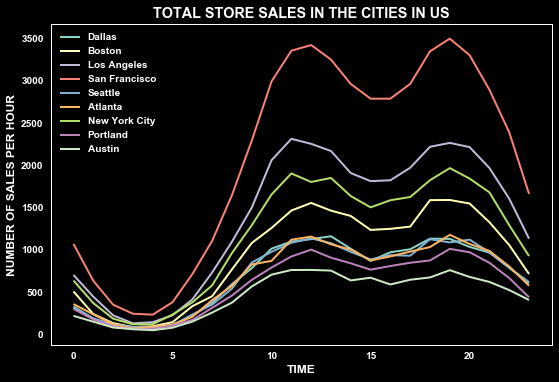

In [148]:
index = df_time.index
plt.style.use("dark_background")

for city in cities:
    plt.plot(index, df_time[city], label=city, linewidth=2)
    
plt.xlabel('TIME', fontweight='bold')
plt.ylabel('NUMBER OF SALES PER HOUR', fontweight='bold')

plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.title('TOTAL STORE SALES IN THE CITIES IN US PER HOUR', fontweight='bold')

plt.legend(prop={'weight':'bold'})
plt.grid()
plt.show()

In [113]:
# lets create the graph individually

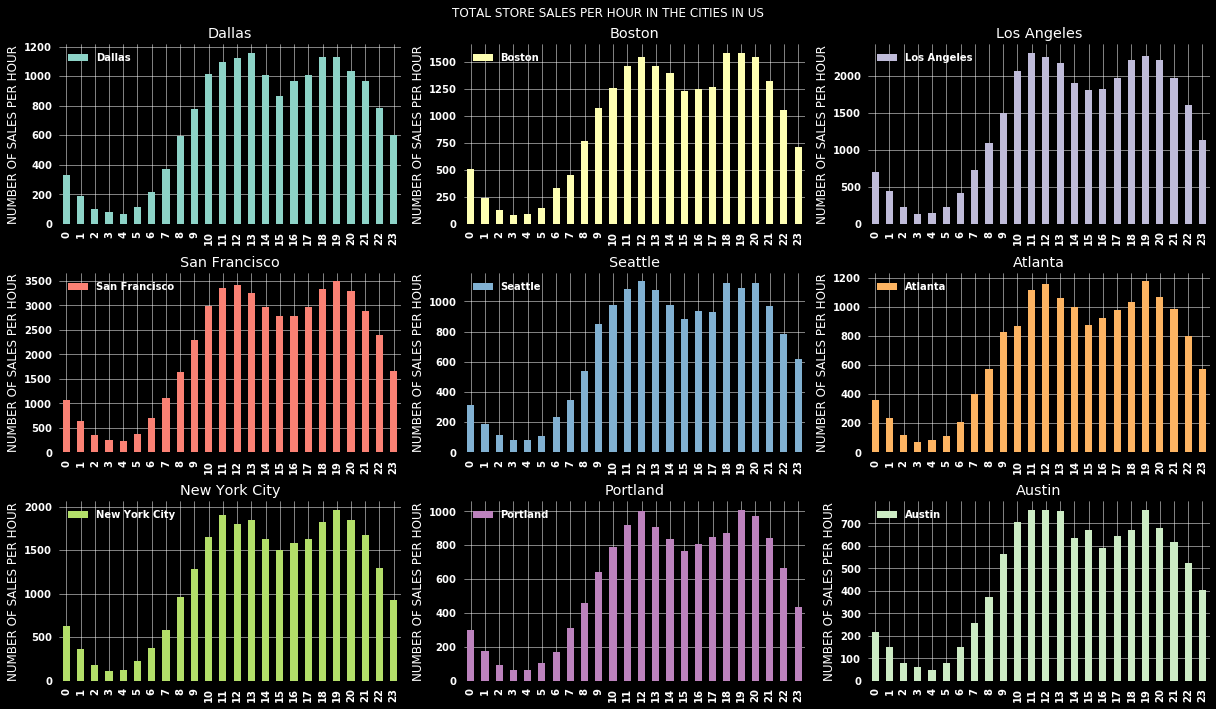

In [109]:
plt.style.use('dark_background')
df_time.plot(kind="bar", subplots=True, figsize=(17, 10), sharex=False, layout=(3, 3), ylabel="NUMBER OF SALES PER HOUR", rot="vertical",
            grid=True, title='TOTAL STORE SALES PER HOUR IN THE CITIES IN US')


plt.subplots_adjust(top=1.2)

plt.tight_layout()
plt.show()

<h1>DURING 10 TO 12 AND 18 TO 22 THERE IS ALWAYS A GREAT NUMBER OF SALES </h1>

# FIND OUT WHICH ITEMS ARE SOLD TOGETHER THE MOST

In [75]:
# to solve this problem we only need the order id and products column

In [115]:
df10 = df8[["Order ID", "Product"]]
df10.head()

,Order ID,Product
0,176558,USB-C Charging Cable
1,176559,Bose SoundSport Headphones
2,176560,Google Phone
3,176560,Wired Headphones
4,176561,Wired Headphones


In [116]:
# we can get the products which are sold toghether by getting the order id which has the same order id
df11 = df10[df10["Order ID"].duplicated(keep=False)] # keep False get all the duplicates
df11.head()

,Order ID,Product
2,176560,Google Phone
3,176560,Wired Headphones
17,176574,Google Phone
18,176574,USB-C Charging Cable
29,176585,Bose SoundSport Headphones


In [117]:
df11["combined_product"] = df11.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))
df11.head()

<ipython-input-117-4a36d2db3345>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11["combined_product"] = df11.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))


,Order ID,Product,combined_product
2,176560,Google Phone,"Google Phone,Wired Headphones"
3,176560,Wired Headphones,"Google Phone,Wired Headphones"
17,176574,Google Phone,"Google Phone,USB-C Charging Cable"
18,176574,USB-C Charging Cable,"Google Phone,USB-C Charging Cable"
29,176585,Bose SoundSport Headphones,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [119]:
df12 = df11.copy()

In [121]:
df12 = df11[["Order ID", "combined_product"]]
df12 = df12.drop_duplicates()
df12.sample(5)

,Order ID,combined_product
152916,294590,"AA Batteries (4-pack),Lightning Charging Cable"
88797,234359,"AA Batteries (4-pack),Bose SoundSport Headphones"
158223,263370,"Google Phone,USB-C Charging Cable"
7337,183587,"AAA Batteries (4-pack),AAA Batteries (4-pack)"
5894,182215,"27in FHD Monitor,Bose SoundSport Headphones"


<p> Now we got which values were sold together. Now we just need to count them </p>

In [123]:
from itertools import combinations
from collections import Counter

row_list = df12.loc[92282]["combined_product"].split(',')
print(row_list)
for cmb in combinations(row_list, 2):
    print(cmb)

['Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones']
('Vareebadd Phone', 'USB-C Charging Cable')
('Vareebadd Phone', 'Wired Headphones')
('USB-C Charging Cable', 'Wired Headphones')


In [124]:
count = Counter()

for row in df12["combined_product"]:
    row_list = row.split(",")
    count.update(combinations(row_list, 2)) # combinations takes in a list and returns a combination with those list elements
    
print(count.most_common(15))

[(('iPhone', 'Lightning Charging Cable'), 1005), (('Google Phone', 'USB-C Charging Cable'), 987), (('iPhone', 'Wired Headphones'), 447), (('Google Phone', 'Wired Headphones'), 414), (('Vareebadd Phone', 'USB-C Charging Cable'), 361), (('iPhone', 'Apple Airpods Headphones'), 360), (('Google Phone', 'Bose SoundSport Headphones'), 220), (('USB-C Charging Cable', 'Wired Headphones'), 160), (('Vareebadd Phone', 'Wired Headphones'), 143), (('Lightning Charging Cable', 'Wired Headphones'), 92), (('Lightning Charging Cable', 'Apple Airpods Headphones'), 81), (('Vareebadd Phone', 'Bose SoundSport Headphones'), 80), (('USB-C Charging Cable', 'Bose SoundSport Headphones'), 77), (('Apple Airpods Headphones', 'Wired Headphones'), 69), (('Lightning Charging Cable', 'USB-C Charging Cable'), 58)]


<h1> Iphone and lighting charging cable was saled together the most </h1>

# FIND OUT WHICH PRODUCTS ARE SOLD THE MOST  AND THEIR RELATIONS TO PRICES

In [125]:
df13 = pd.read_csv('./output/all_sales_data.csv')
df13["price"] = df13["Price Each"] * df13["Quantity Ordered"]
df13.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,price
0,176558,USB-C Charging Cable,2,11.95000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90000
1,176559,Bose SoundSport Headphones,1,99.99000,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99000
2,176560,Google Phone,1,600.00000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00000
3,176560,Wired Headphones,1,11.99000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99000
4,176561,Wired Headphones,1,11.99000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99000


In [126]:
prd_grp = df13.groupby("Product").sum()[["Quantity Ordered", "price"]]
prd_grp.head()

,Quantity Ordered,price
Product,,
20in Monitor,4129,454148.71000
27in 4K Gaming Monitor,6244,2435097.56000
27in FHD Monitor,7550,1132424.50000
34in Ultrawide Monitor,6199,2355558.01000
AA Batteries (4-pack),27635,106118.40000


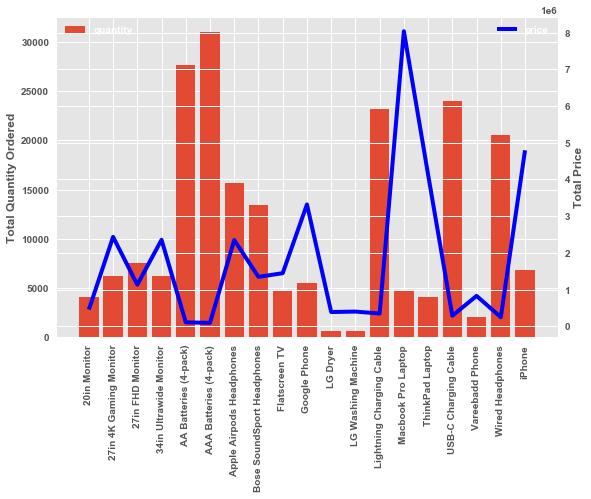

In [155]:
plt.style.use('ggplot')

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()


ax1.bar(prd_grp.index, prd_grp["Quantity Ordered"], label="quantity")
ax2.plot(prd_grp.index, prd_grp["price"], label="price", color='blue')

ax1.set_xticks(prd_grp.index)
ax1.legend(loc="upper left")

ax2.legend()
ax1.set_xticklabels(prd_grp.index, rotation="vertical", fontweight='bold')

ax1.set_ylabel('Total Quantity Ordered', fontweight='bold')
ax2.set_ylabel('Total Price', fontweight='bold')


plt.show()